# Bank Marketing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


In [2]:
data = pd.read_csv('C:\\Users\\admin\\OneDrive\\Desktop\\bank.csv')
df = data.copy()



In [3]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
# df.drop(['contact'],axis=1,inplace=True)


In [6]:
df.poutcome.unique()


array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [7]:
df.shape


(11162, 17)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [10]:
df_count = df.select_dtypes(include = 'number')
df_count   


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [11]:
df_count.describe()


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [12]:
df.head(1)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes


<Axes: xlabel='age', ylabel='count'>

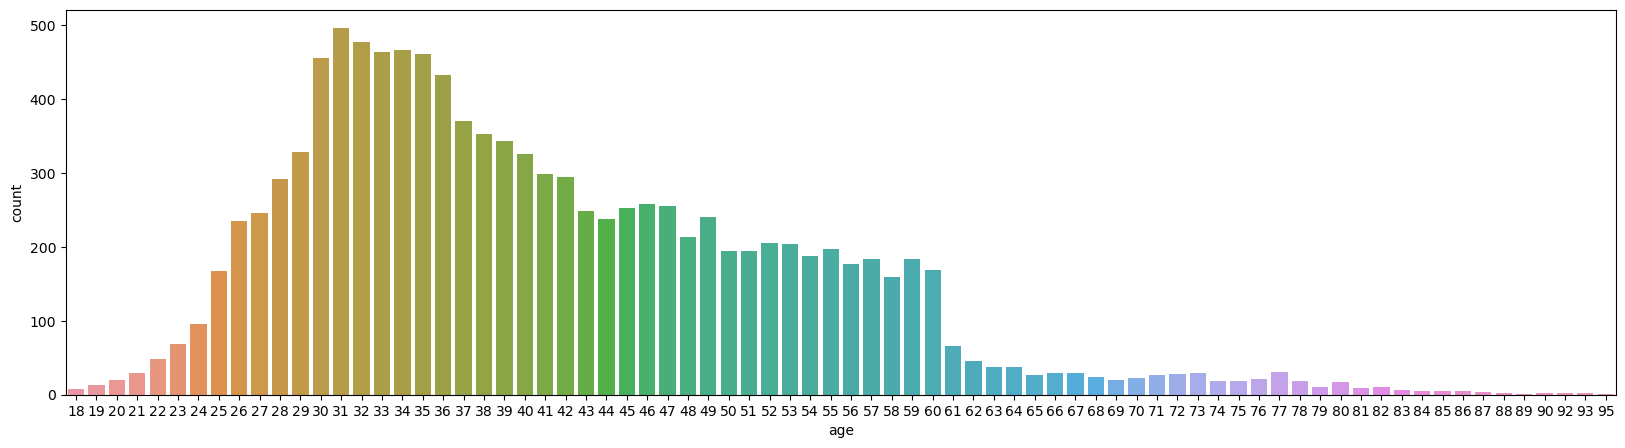

In [13]:
plt.figure(figsize = (20,5))
sns.countplot(x = 'age', data = df)


(-1.09999995321404,
 1.0999998241970523,
 -1.0999965311668554,
 1.0999998347409465)

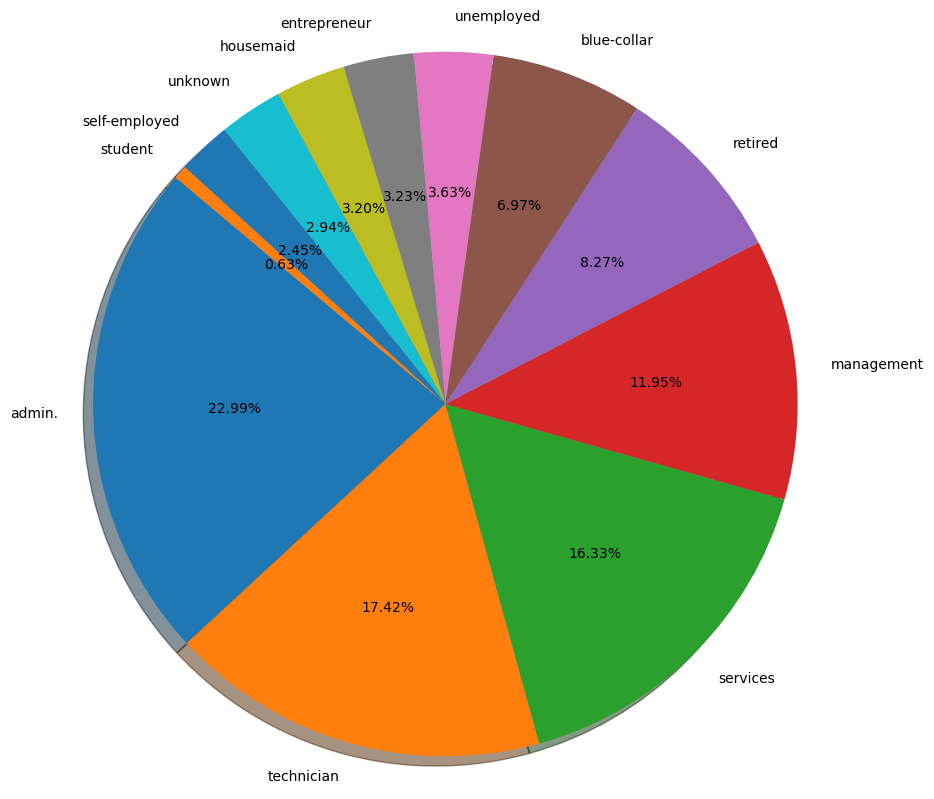

In [14]:
# explode = [0.2, 0, 0, 0]
plt.figure(figsize=(10,10))
plt.pie(df.job.value_counts(), labels=df.job.unique(), autopct='%1.2f%%', shadow=True, startangle=140)

plt.axis('equal') 


<Axes: xlabel='job', ylabel='count'>

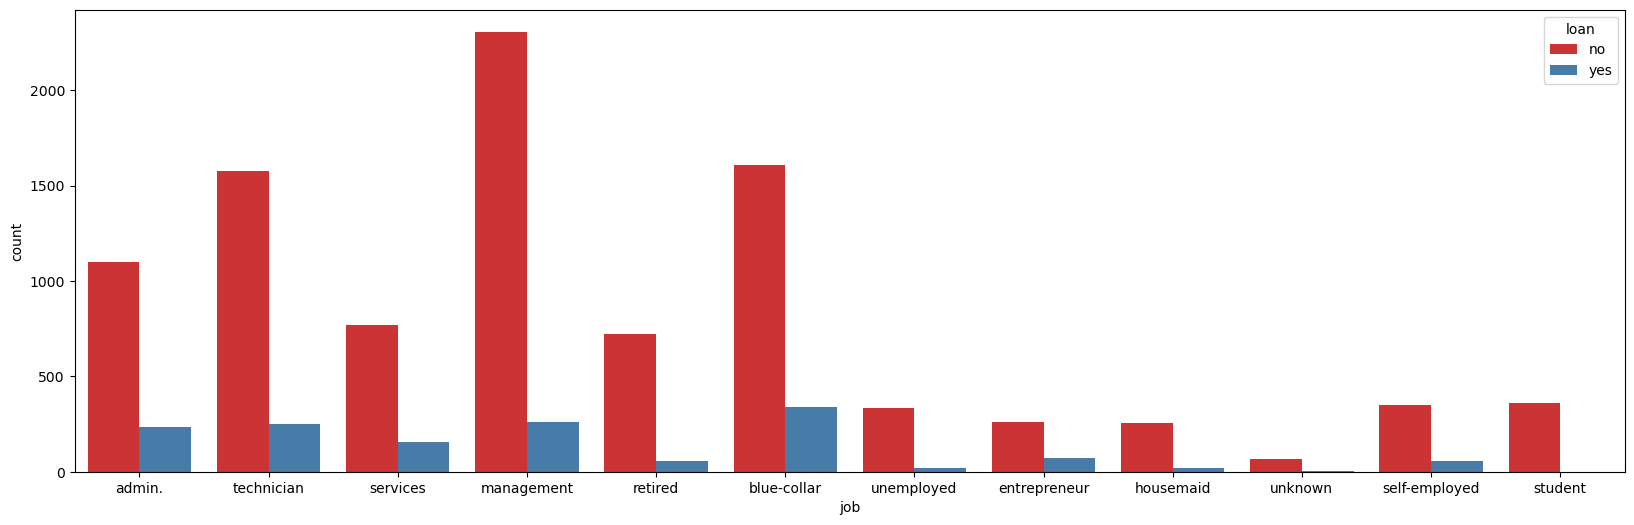

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(x='job', data=df,hue='loan',palette='Set1')


<Axes: xlabel='job', ylabel='count'>

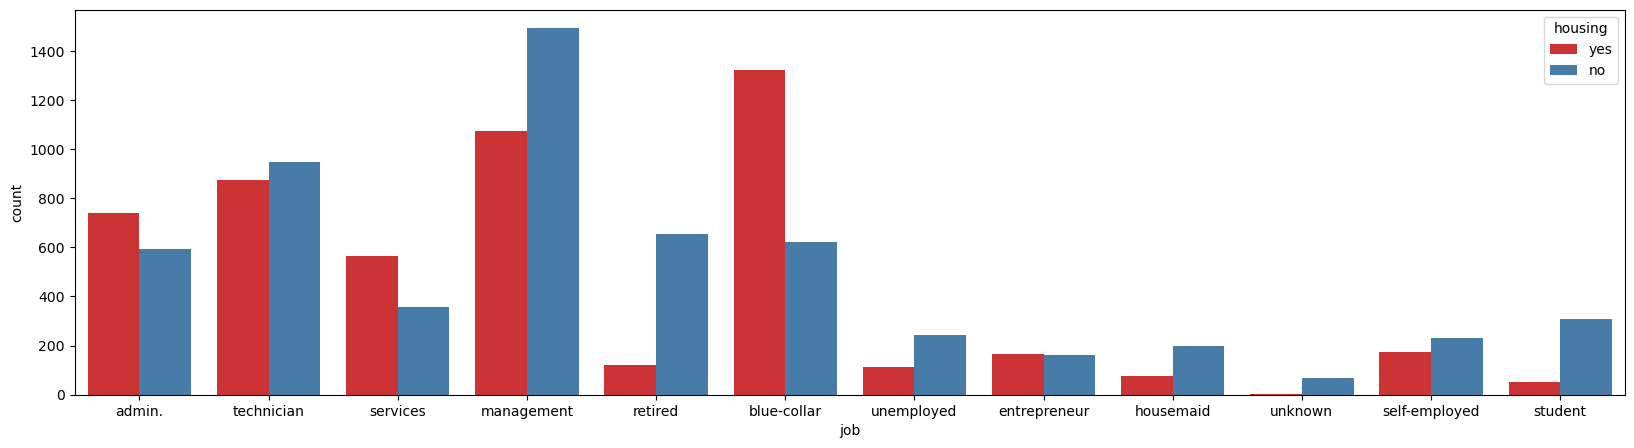

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(x='job', data=df,hue='housing',palette='Set1')


Text(0, 0.5, 'deposit')

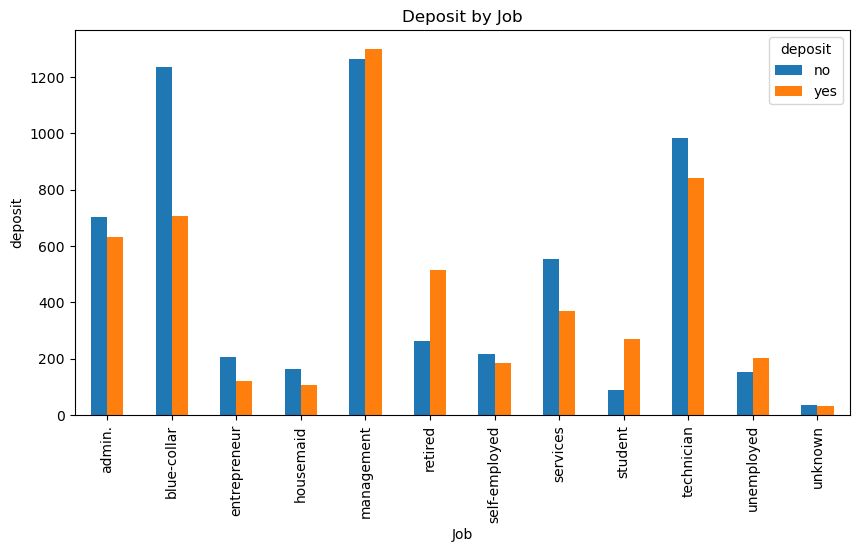

In [18]:
# plt.figure(figsize=(0,5))
# sns.barplot(x = x.index,y = x.values,data =x)
import matplotlib.pyplot as plt
df.groupby(["job"])['deposit'].value_counts().unstack().plot(kind='bar',figsize=(10,5))
plt.title("Deposit by Job")
plt.xlabel("Job")
plt.ylabel("deposit")#.reset_index()


Text(0, 0.5, 'housing loan')

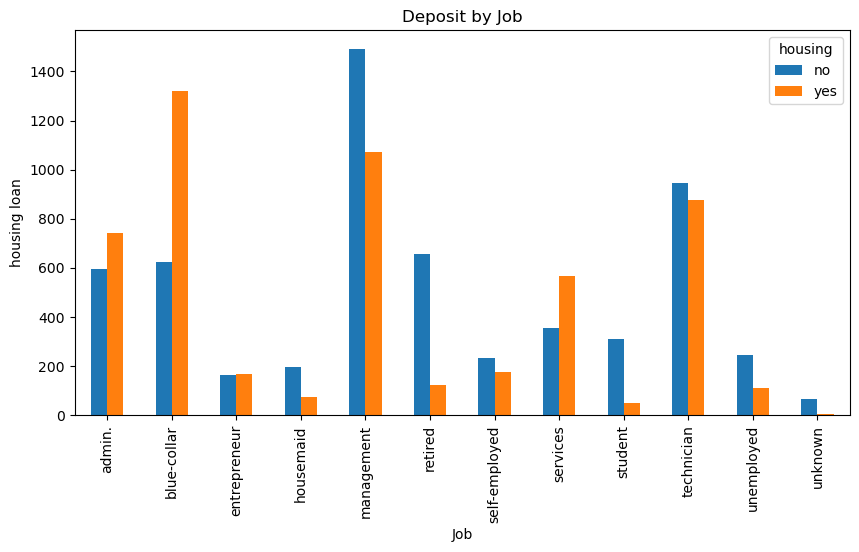

In [19]:
df.groupby(['job'])['housing'].value_counts().unstack().plot(kind='bar',figsize=(10,5))
plt.title("Deposit by Job")
plt.xlabel("Job")
plt.ylabel("housing loan")


<Axes: title={'center': 'Loan by Job'}, xlabel='job'>

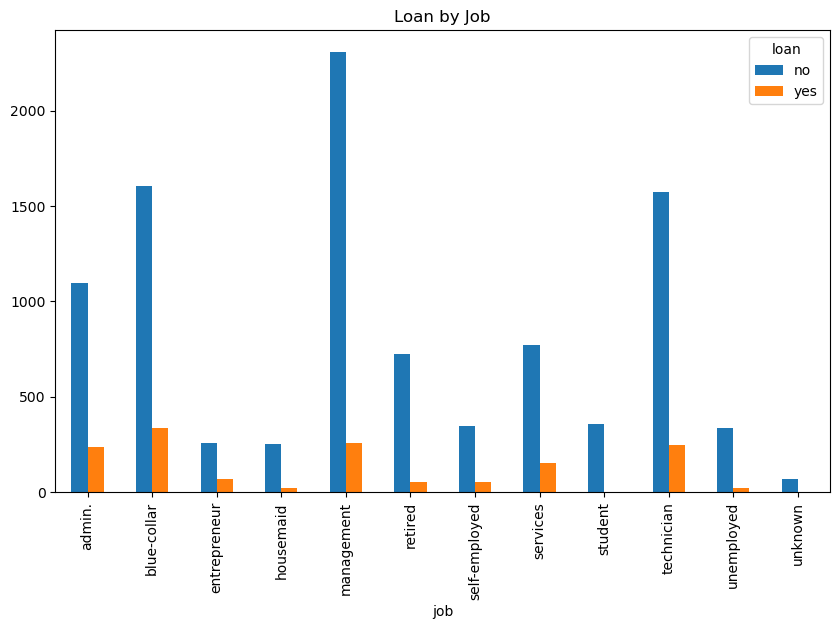

In [20]:
df.groupby(['job'])['loan'].value_counts().unstack().plot(kind='bar', figsize=(10, 6), title='Loan by Job')


<Axes: xlabel='job'>

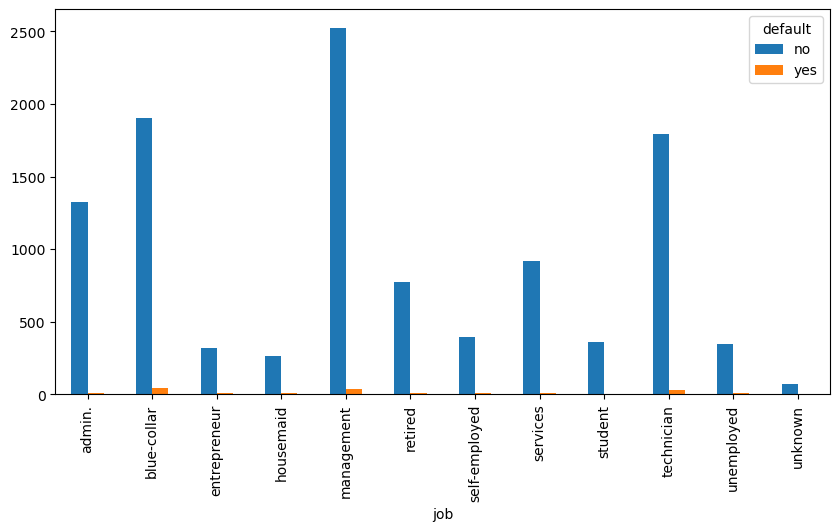

In [21]:
df.groupby(['job'])['default'].value_counts().unstack().plot(kind='bar',figsize=(10,5))


In [22]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

<Axes: xlabel='age', ylabel='loan'>

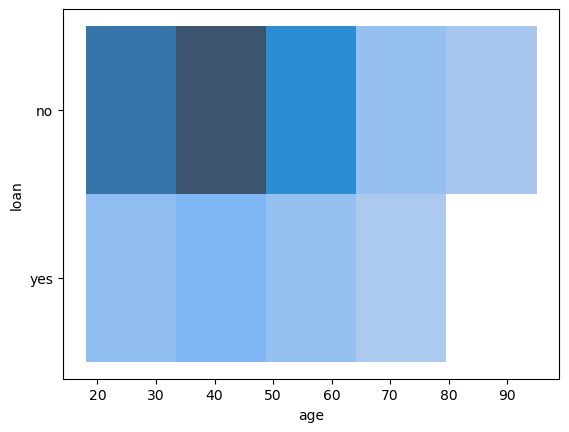

In [23]:
sns.histplot(x=df['age'],y=df['loan'],bins=5)


<Axes: xlabel='age', ylabel='housing'>

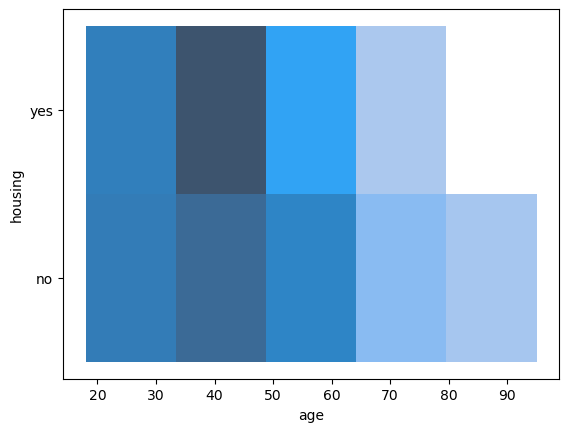

In [24]:
sns.histplot(x=df['age'],y=df['housing'],bins=5)


<Axes: xlabel='marital', ylabel='count'>

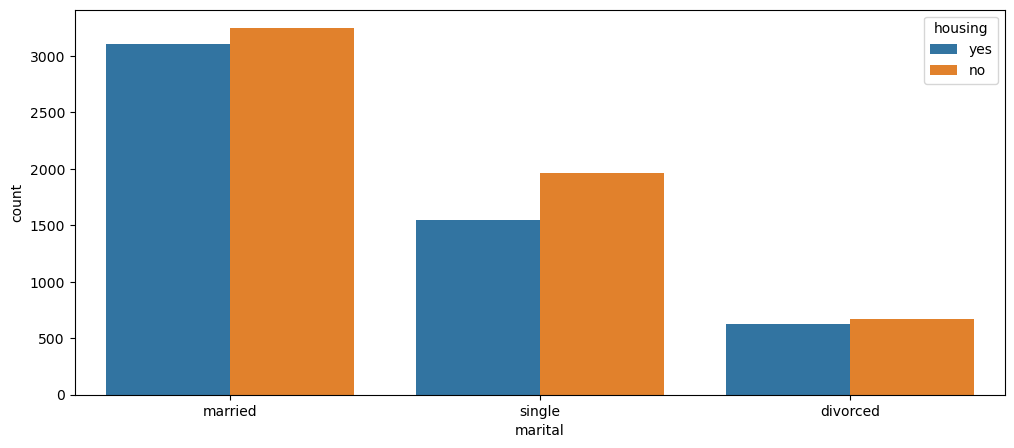

In [25]:
plt.figure(figsize=(12,5))
sns.countplot(x='marital', data=df, hue='housing')


In [26]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# Encoding


In [27]:
def replace(col_name, df):
    df[col_name] = df[col_name].replace({'yes': 1, 
                                          'no': 0})
    return df
col = ['default','housing','loan','deposit']
for i in col:
    df = replace(i, df)


In [28]:
def cat_replace(col_nmae,df):
    le = preprocessing.LabelEncoder()
    le.fit(df[col_nmae])
    df[col_nmae] = le.transform(df[col_nmae])
    return df
label = ['job','marital','education','month','poutcome','contact']
for i in label:
    cat_replace(i,df)
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


# Feature and label creation


In [29]:
X = df.drop(['deposit'], axis = 1)
y = df['deposit']


In [30]:
X


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0


# Train test split


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# KNN model


In [32]:
scores = []
for i in range(3,30,2):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    scores.append(knn.score(X_train, y_train))
# y_pred = knn.predict(X_test)
print(scores.index(max(scores)))

# knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
# print(knn.score(X_train, y_train),knn.score(X_test, y_test))


0


# Random Forest


In [33]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))

print(rf.score(X_test, y_test))


1.0
0.8293775190326914


# Feature importance


In [34]:
rf.feature_importances_


array([0.0825271 , 0.03844495, 0.0179477 , 0.02294397, 0.00131658,
       0.08696577, 0.03019261, 0.00983364, 0.04554396, 0.07115487,
       0.08122382, 0.37715495, 0.03356063, 0.04376111, 0.02327296,
       0.03415539])

In [35]:
feature_importance = pd.DataFrame({'importance': rf.feature_importances_}, index= df.columns[:-1]).sort_values('importance')


In [36]:
feature_importance.sort_values(by='importance', ascending=False)


,importance
duration,0.377155
balance,0.086966
age,0.082527
month,0.081224
day,0.071155
contact,0.045544
pdays,0.043761
job,0.038445
poutcome,0.034155
campaign,0.033561


In [37]:
feature_importance[feature_importance.importance>0.035759]


,importance
job,0.038445
pdays,0.043761
contact,0.045544
day,0.071155
month,0.081224
age,0.082527
balance,0.086966
duration,0.377155


In [38]:
imp = feature_importance[feature_importance.importance>0.035759].index


In [39]:
imp

Index(['job', 'pdays', 'contact', 'day', 'month', 'age', 'balance',
       'duration'],
      dtype='object')

In [40]:
X = df[imp]


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train),rf.score(X_test, y_test))



0.9908164408108411 0.8083296014330497


# Hyperparameter Tunning


In [43]:
# from sklearn.model_selection import GridSearchCV
hyt = RandomForestClassifier(random_state=42)
param_distributions = {
    'n_estimators': np.arange(10, 200, 20),
    'max_depth': [None] + list(np.arange(10, 90, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(hyt, param_distributions, n_iter=100, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
print("\nBest Random Forest Model Train: ",random_search.score(X_train,y_train),"\nBest Random Forest Model Test: ",random_search.score(X_test,y_test))



Best Random Forest Model Train:  0.9619218277522679 
Best Random Forest Model Test:  0.8356471115091805


# GridSearchcv


In [44]:
rf_model = RandomForestClassifier(random_state=42)


In [45]:
  param_grid = {

    'n_estimators': [5, 2,4],
    'max_depth': [1,4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}


In [46]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("\nBest Random Forest Model Train: ",grid_search.score(X_train,y_train),"\nBest Random Forest Model Test: ",grid_search.score(X_test,y_test))



Best Random Forest Model Train:  0.7756747676111546 
Best Random Forest Model Test:  0.7541424093148231


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
